<div style="text-align: center">

<b><h1>  </h1></b>
<h2> Assignment 4 - Clustring </h2>
<h2> Modern Information Retrieval Course </h2>
<h3> Dr. Asgari </h3>
<h3> Group Members </h3>
Parsa Mohammadian - 98102284
<br/>
Sara Azarnoush - 98170668
<br/>
Kahbod Aeini - 98101209 
<br/>
<br/>
Sharif University of Technology
<br/>
Computer Engineering Department
<hr/>
</div>

### Introduction

In this project, we want to clustering tweets using Kmeans. 
Steps of the process are:
- Load the data
- Preprocess the data
  - Tokenize the data
  - Normalize the data
  - Stem the data
  - Rejoin the tokens
- Clustering
  - Vectorize
  - Number of clusters
    - Elbow Method
  - Visualization
    - PCA
    - t-SNE
  - Evaluation
    - RSS
    - Silhoutte score
    - Silhouette visualizer
    - Intercluster Distance Maps
    - Purity score


### Requirements

---

In [1]:
try:
    from google.colab import drive
    COLAB = True
except:
    COLAB = False
    print('Not in Google Colab')

if COLAB:
  drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import clear_output


In [3]:
%pip install pandas
%pip install nltk
%pip install sklearn
%pip install numpy
clear_output()


In [4]:
import pandas as pd
import nltk
import string
import functools
#
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

clear_output()


# <strong><font color=#8FBCCC></span> Load Data </strong> 
First, we load the [sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140) dataset which is provided by the documentation of the project into pandas dataframe. The dataset contains about 200MB of labelled data. After that, we drop redundant columns and keep only the tweet and the sentiment. The sentiment is encoded as a number from 0(negative) and 4(positive). We also remapped them to 0 and 1. Finally, since the data is to large for normal computer to process, we used fraction of the data in the rest of the notebook.

---


In [6]:
if COLAB:
    PATH_TO_SENTIMENT140_DATASET = 'drive/MyDrive/datasets/training.1600000.processed.noemoticon.csv'
else:
    PATH_TO_SENTIMENT140_DATASET = '../datasets/training.1600000.processed.noemoticon.csv'
CSV_COLUMNS = ['target', 'id', 'date', 'flag', 'user', 'text']
TEST_SIZE = 0.2


df = pd.read_csv(PATH_TO_SENTIMENT140_DATASET)
df.columns = CSV_COLUMNS
df.drop(columns=['id', 'date', 'flag', 'user'], inplace=True)
df['target'] = df['target'].map({0: 0, 4:1})
df.head()


,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


#### Sample Data

Limit the size of the dataset in order to limit resource and time usage.


In [7]:
df = df.sample(n=1000)


# <strong><font color=#8FBCCC></span> Preprocess Data </strong> 
Here we used nltk package and other defined functions to normalize the data as explained in the introduction. 

---

#### Tokenize Text

In [8]:
df['text_tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(x))


#### Normalize Text

In [9]:
def to_lower(tokens: list) -> list:
    """
    Converts the tokens to lower case.
    """
    return [token.lower() for token in tokens]
    

def contains_any_of(token: list, chars: str) -> bool:
    """
    Returns true if the token contains any of the characters in the given list.
    """
    return any(char in token for char in chars)


def remove_punctuation(tokens: list) -> list:
    """
    Removes punctuation from the given tokens.
    """
    return [token for token in tokens if not contains_any_of(token, string.punctuation+"’‘•")]


def remove_stop_words(tokens: list) -> list:
    """
    Removes stop words from the given tokens.
    """
    remove_stop_words.stop_words = set(nltk.corpus.stopwords.words('english'))
    return [token for token in tokens if token not in remove_stop_words.stop_words]


def normalize(tokens):
    """
    Normalizes the tokens of the lyrics.
    """
    normalization_functions = [to_lower, remove_punctuation, remove_stop_words]
    return functools.reduce(lambda x, f: f(x), normalization_functions, tokens)


df['text_normalized'] = df['text_tokenized'].apply(normalize)


#### Stem Text

In [10]:
stemmer = nltk.stem.SnowballStemmer('english')
df['text_stemmed'] = df['text_normalized'].apply(lambda x: [stemmer.stem(t) for t in x])


#### Join Text

In [11]:
df['text_preprocessed'] = df['text_stemmed'].apply(lambda x: ' '.join(x))


#### Preprocess Effect

<strong>Pre-processing has given clustering many advantages:</strong> 


*   Better and faster performances
*   Removing step-words and lematizing is also make the better.


After pre-processing we found kmeans, checked various evaluations and observe that our way is doing very good in clustering. 

Then we Visualize them and compare them with original labels visualization and we saw that they look very similar. 
<br>This means that the work is done correctly!😃

# <strong><font color=#8FBCCC></span> Clustring </strong> 

## <strong><font color=#8FBC8F></span> Vectorize Text </strong> 

In [12]:
# tfidf_vectorizer = sk.feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(use_idf = True, norm ='l2', ngram_range=(1,1))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_preprocessed'])
vocabulary = tfidf_vectorizer.get_feature_names_out()


## <strong><font color=#8FBC8F></span> Finding the number of clusters </strong> 
Define what is the best number for n_clusters.


 

###Elbow Method
To optimal value of k in KMeans.

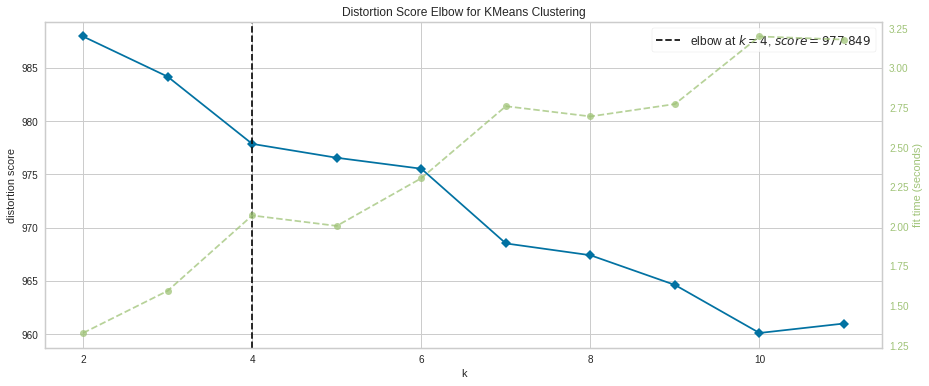

In [32]:
x = tfidf_matrix.toarray()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(x)
visualizer.show()

clusters are positive and negative

In [14]:
k = 2

## <strong><font color=#8FBC8F></span> Visualization </strong> 

Cluster visualization renders cluster data as an interactive map. 
<br>
This will allow us to see a quick overview of our cluster sets and quickly drill into each cluster set to view subclusters and conceptually-related clusters.


####Find the correct labels for the dataset
To visualize both of them so we can compare them.

In [15]:
true_labels = df['target']

To visualize the clusters we can use some of the most popular methods for dimensionality reduction, namely <strong><font color=#c69bf5>PCA</font></strong> and <strong><font color=#c69bf5>t-SNE</font></strong>.

### <strong><font color=#c69bf5></span> PCA </strong> 
Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tfidf_matrix.toarray())

In [17]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(tfidf_matrix)
predicted_labels = kmeans.labels_

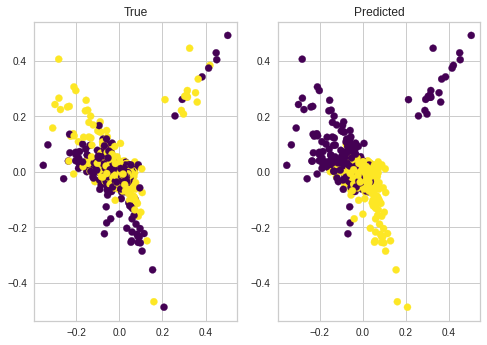

In [18]:
#plot 1:
plt.subplot(1, 2, 1)
plt.scatter(principalComponents[:,0], principalComponents[:,1],  c=true_labels, s=50, cmap='viridis')
plt.title("True")
plt.rcParams["figure.figsize"] = (30,6)

#plot 2:
plt.subplot(1, 2, 2)
plt.scatter(principalComponents[:,0], principalComponents[:,1],  c=predicted_labels, s=50, cmap='viridis')
plt.title("Predicted")
plt.rcParams["figure.figsize"] = (30,6)


plt.show()

### <strong><font color=#c69bf5></span> t-SNE </strong> 
t-SNE ( t-Distributed Stochastic Neighbor Embedding) is a technique that visualizes high dimensional data by giving each point a location in a two or three-dimensional map. The technique is the Stochastic Neighbor Embedding (SNE) variation that is much easier to optimize and produces significantly better visualization.

In [19]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(tfidf_matrix.toarray())
X_embedded.shape

(1000, 2)

In [20]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(tfidf_matrix)
y = kmeans.labels_

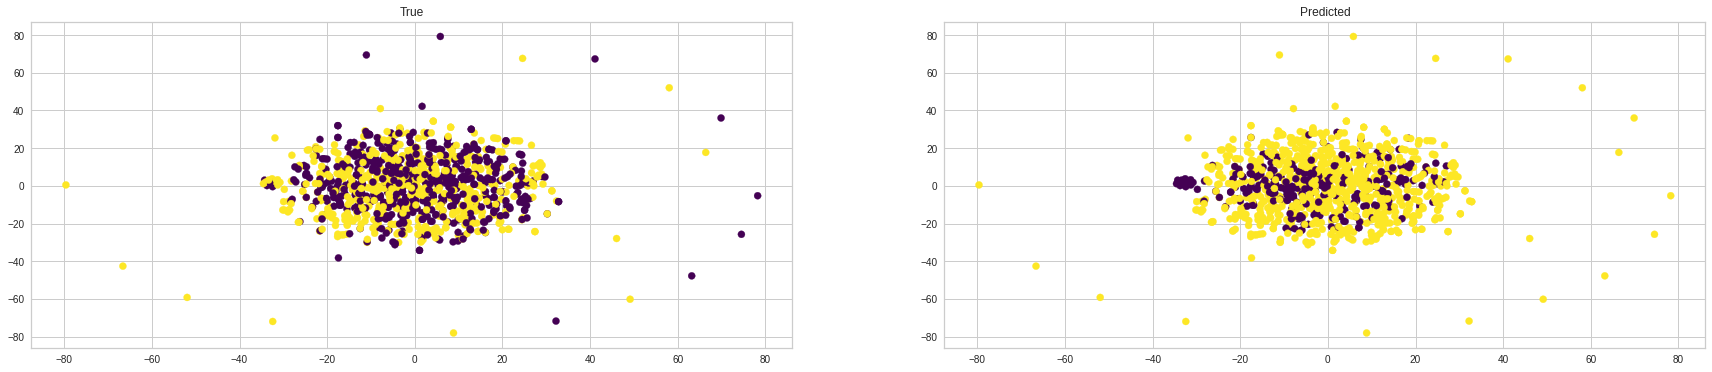

In [21]:
#plot 1:
plt.subplot(1, 2, 1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=true_labels, s=50, cmap='viridis')
plt.title("True")
plt.rcParams["figure.figsize"] = (15,6)

#plot 2:
plt.subplot(1, 2, 2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=50, cmap='viridis')
plt.title("Predicted")
plt.rcParams["figure.figsize"] = (15,6)


plt.show()


## <strong><font color=#8FBC8F></span> Evaluation </strong> 
After visualization, we have to evaluate our model. To evaluate the clusters we can use some of the most popular methods for evaluating clustering, so we use **three** different methods, namely <strong><font color=#DAA520>RSS</font></strong>, <strong><font color=#DAA520>silhoutte score</font></strong>, and <strong><font color=#DAA520>purity score</font></strong>.

### <strong><font color=#DAA520></span> RSS evaluation </strong> 


In [22]:
def calculate_RSS(docs, centers, labels):
  RSS = 0
  for i in range(len(df['text_preprocessed'])):
    RSS += np.sum(np.square(docs[i] - centers[labels[i]]))
  return RSS

We know that The lower the RSS value, means the better clustering method!


In [23]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(tfidf_matrix)
RSS = calculate_RSS(tfidf_matrix, kmeans.cluster_centers_, kmeans.labels_)
print("RSS is {}".format(RSS))

RSS is 988.3598210168306


We can use different random_state for KMeans.


In [24]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(tfidf_matrix)
for i in range(5):
  kmeans = KMeans(n_clusters=k, random_state=i).fit(tfidf_matrix)
  RSS = calculate_RSS(tfidf_matrix, kmeans.cluster_centers_, kmeans.labels_)
  print("For random_state={}, RSS is {}".format(i, RSS))

For random_state=0, RSS is 988.3598210168306
For random_state=1, RSS is 988.0255374923406
For random_state=2, RSS is 987.8952538539123
For random_state=3, RSS is 987.9276200664818
For random_state=4, RSS is 987.9974612983293


But we can see that The scores obtained are not much different, so we still use random_state = 0.

### <strong><font color=#DAA520></span> silhouette score </strong> 

In [25]:
silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
print("For n_clusters =", k, "The average silhouette_score is :",silhouette_avg,)

For n_clusters = 2 The average silhouette_score is : 0.0015220490809815933


Even we can find *k* using Silhouette Coefficient and choose the *k* with the highest score.


In [26]:
maximum = 0
arg_max = 0
for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(tfidf_matrix)
    sil_coeff = silhouette_score(tfidf_matrix, kmeans.labels_, metric='euclidean')
    if sil_coeff > maximum:
      maximum = sil_coeff
      arg_max = n_cluster
    print("For n_clusters = " + str(n_cluster) + ", The Silhouette Coefficient is " + str(sil_coeff))
print("\n So the optimal k is " + str(arg_max) + " with The Silhouette Coefficient of " + str(maximum))

For n_clusters = 2, The Silhouette Coefficient is 0.001996642099103811
For n_clusters = 3, The Silhouette Coefficient is 0.0031049359790687784
For n_clusters = 4, The Silhouette Coefficient is 0.0033332923084889283
For n_clusters = 5, The Silhouette Coefficient is 0.005019379272679976
For n_clusters = 6, The Silhouette Coefficient is 0.004578106823019626
For n_clusters = 7, The Silhouette Coefficient is 0.005316165040228657
For n_clusters = 8, The Silhouette Coefficient is 0.0053039221285241375
For n_clusters = 9, The Silhouette Coefficient is 0.006511506755829736
For n_clusters = 10, The Silhouette Coefficient is 0.006929063966206509
For n_clusters = 11, The Silhouette Coefficient is 0.007361250950280086

 So the optimal k is 11 with The Silhouette Coefficient of 0.007361250950280086


### <strong><font color=#DAA520></span> Silhouette visualizer </strong> 

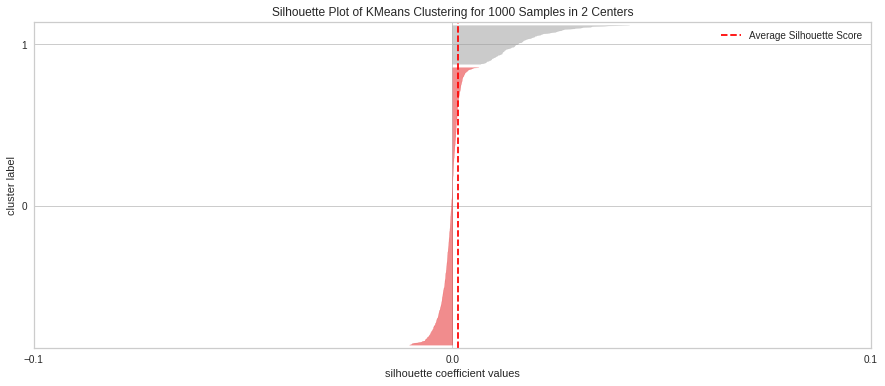

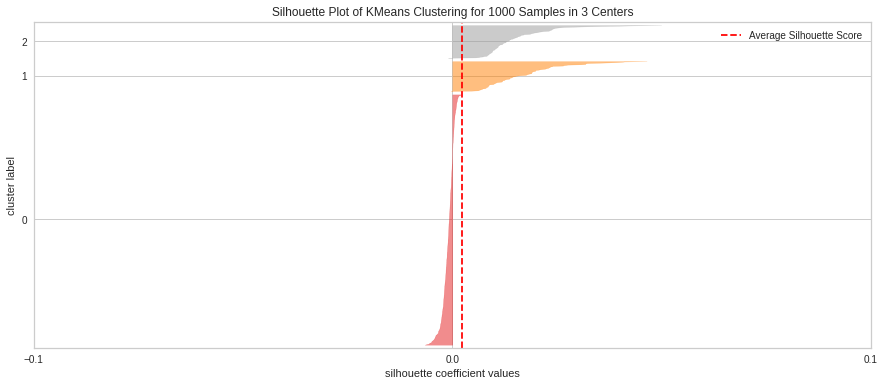

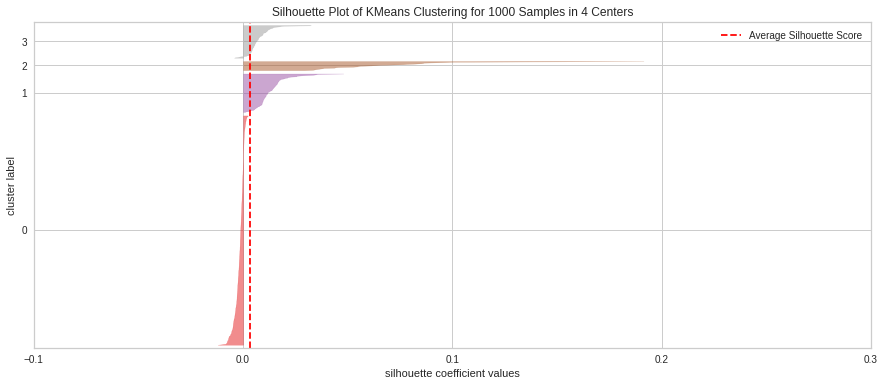

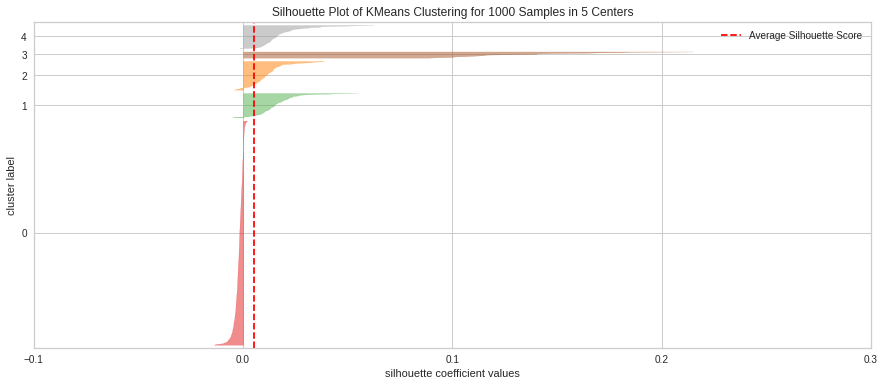

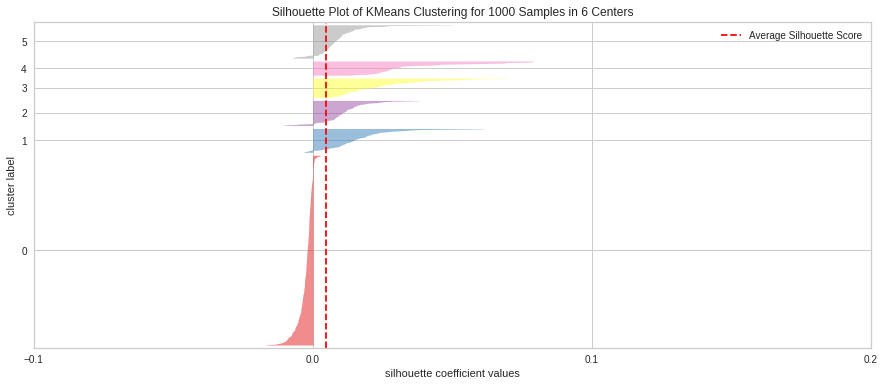

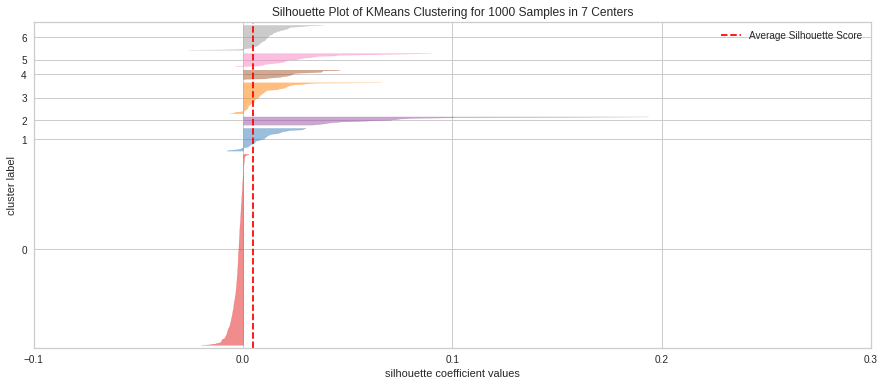

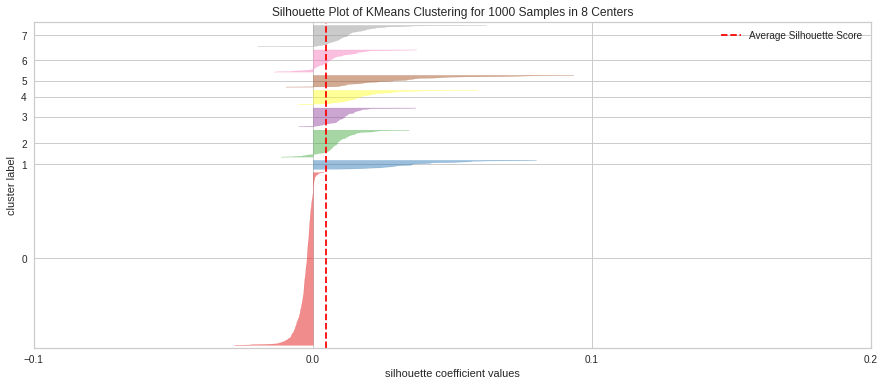

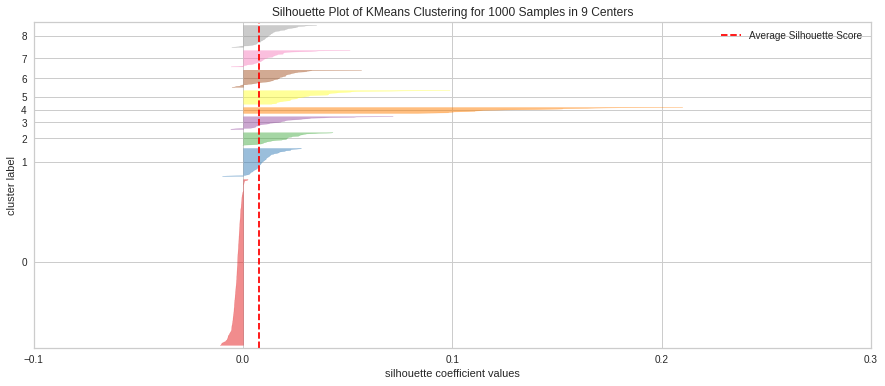

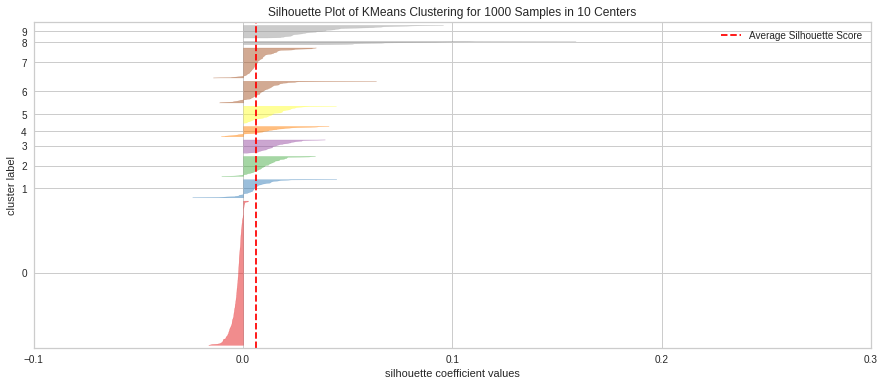

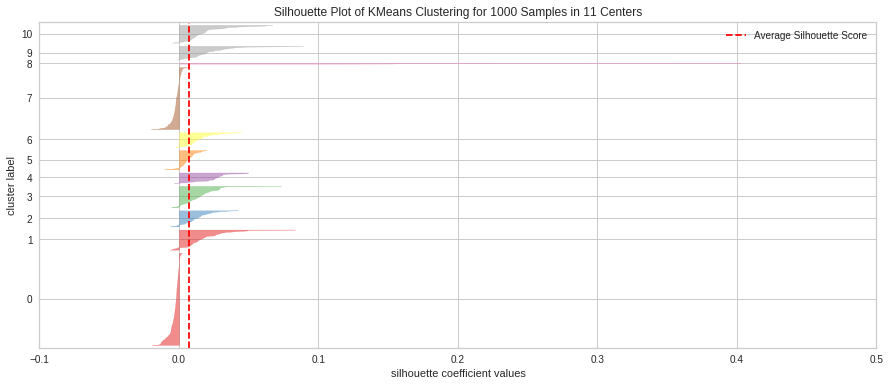

In [33]:
x = tfidf_matrix.toarray()
for i in range(2,12):
  model = KMeans(i, random_state=0)
  visualizer = SilhouetteVisualizer(model)
  visualizer.fit(x)   
  visualizer.show() 

highest average silhouette score means better k


### <strong><font color=#DAA520></span> Intercluster Distance Maps </strong> 
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center.


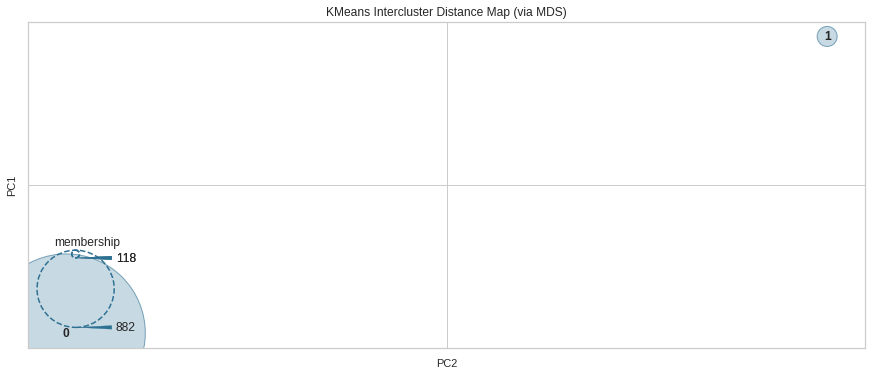

In [35]:
x = tfidf_matrix.toarray()
model = KMeans(k)
visualizer = InterclusterDistance(model, random_state=0).fit(x)       
visualizer.show() 


### <strong><font color=#DAA520></span> Purity score </strong> 
adefine purity_score and evaluate our model.


In [27]:
true_labels = df['target']

In [28]:
def purity_score(true_labels, predicted_labels):
    arr = np.zeros(true_labels.shape)

    labels = np.unique(true_labels)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        true_labels[true_labels==labels[k]] = ordered_labels[k]

    labels = np.unique(true_labels)
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(predicted_labels):
        winner = np.argmax( np.histogram(true_labels[predicted_labels==cluster], bins=bins)[0])
        arr[predicted_labels==cluster] = winner

    return accuracy_score(true_labels, arr)

In [29]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(tfidf_matrix)
purity_score(true_labels, kmeans.labels_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.526